# Pymaceuticals
- Treatment including Capomulin exhibits a decrease in tumor size.
- Treatment including Capomulin exhibits slower spread of metastatic sites. 
- Treatment including Capomulin exhibits slower decrease in survival rates.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Samuel Norman Seaborn

In [2]:
mouseFile = "resources/mouse_drug_data.csv"
drugFile = "resources/clinicaltrial_data.csv"
mouseDF = pd.read_csv(mouseFile)
drugDF = pd.read_csv(drugFile)

In [3]:
mouseDF[mouseDF["Drug"]=="Capomulin"].sort_values(by="Mouse ID").head(3)

,Mouse ID,Drug
75,b128,Capomulin
80,b742,Capomulin
81,f966,Capomulin


In [4]:
drugDF[(drugDF["Metastatic Sites"]==0)&(drugDF["Timepoint"]!=0)].tail()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
1799,z578,45,30.638696,0
1829,b742,45,38.939633,0
1836,a444,45,43.047543,0
1846,x401,45,28.484033,0
1851,i901,45,65.341811,0


In [5]:
# select only the 4 drugs we are comparing
drugs4 = mouseDF[(mouseDF["Drug"]=="Capomulin")|(mouseDF["Drug"]=="Infubinol")|(mouseDF["Drug"]=="Ketapril")|(mouseDF["Drug"]=="Placebo")].merge(drugDF)

### Tumor Response to Treatment

In [6]:
# get the mean tumor volume by drug by timepoint
TumorVolume = drugs4.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean().to_frame("Tumor Volume (mm3)")
# pivot the results so each drug is a column
TumorVolumePivot = pd.pivot_table(TumorVolume, index=["Timepoint"], values=["Tumor Volume (mm3)"], columns="Drug")
# get the sem for tumor volume for each drug by timepoint
TumorVolumeSEM = drugs4.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem().to_frame("Tumor Volume (mm3)")
# pivot the results so each drug is a column
TumorVolumeSEMPivot = pd.pivot_table(TumorVolumeSEM, index=["Timepoint"], values=["Tumor Volume (mm3)"], columns="Drug")
TumorVolumeSEMPivot


Tumor Volume (mm3)                              
Drug               Capomulin Infubinol  Ketapril   Placebo
Timepoint                                                 
0                   0.000000  0.000000  0.000000  0.000000
5                   0.448593  0.235102  0.264819  0.218091
10                  0.702684  0.282346  0.357421  0.402064
15                  0.838617  0.357705  0.580268  0.614461
20                  0.909731  0.476210  0.726484  0.839609
25                  0.881642  0.550315  0.755413  1.034872
30                  0.934460  0.631061  0.934121  1.218231
35                  1.052241  0.984155  1.127867  1.287481
40                  1.223608  1.055220  1.158449  1.370634
45                  1.223977  1.144427  1.453186  1.351726

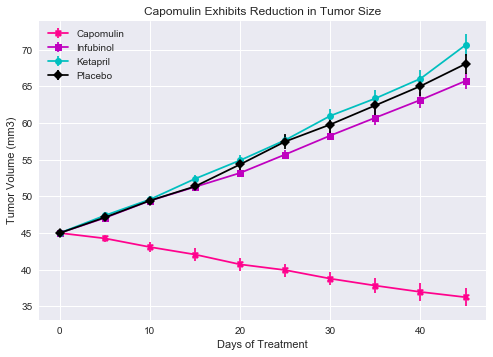

In [7]:
# plot the results

# TumorVolumePivot.index.get_level_values(0) is equal to the timepoint if we don't reset the index
# TumorVolumePivot[('Tumor Volume (mm3)','Capomulin')] - need to specify both levels of index (tumor volume and drug) to get drug column since tumor level was created as level when creating pivot
plt.errorbar(TumorVolumePivot.index.get_level_values(0), TumorVolumePivot[('Tumor Volume (mm3)','Capomulin')], color="xkcd:hot pink", marker="X", label="Capomulin", yerr=TumorVolumeSEMPivot[('Tumor Volume (mm3)','Capomulin')])
plt.errorbar(TumorVolumePivot.index.get_level_values(0), TumorVolumePivot[('Tumor Volume (mm3)','Infubinol')],  marker="s", color="m", label="Infubinol", yerr=TumorVolumeSEMPivot[('Tumor Volume (mm3)','Infubinol')])
plt.errorbar(TumorVolumePivot.index.get_level_values(0), TumorVolumePivot[('Tumor Volume (mm3)','Ketapril')], marker = "o", color="c", label="Ketapril", yerr=TumorVolumeSEMPivot[('Tumor Volume (mm3)','Ketapril')])
plt.errorbar(TumorVolumePivot.index.get_level_values(0), TumorVolumePivot[('Tumor Volume (mm3)','Placebo')], color="k", marker="D", label="Placebo", yerr=TumorVolumeSEMPivot[('Tumor Volume (mm3)','Placebo')])

plt.title("Capomulin Exhibits Reduction in Tumor Size")
plt.xlabel("Days of Treatment")
plt.ylabel("Tumor Volume (mm3)")   
plt.legend()

plt.show()

### Metastatic Response to Treatment

In [8]:
# get the mean metastatic sites per drug per timepoint
MetastaticSites = drugs4.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean().to_frame("Metastatic Sites")
# pivot the results so that each drug is a column
#  NOTE: if values is in brackets, it creates another level and must be called in addition to column
MetastaticSitesPivot = pd.pivot_table(MetastaticSites, index="Timepoint", columns="Drug", values=["Metastatic Sites"])
# get the sem of the metastatic sites
MetastaticSitesSEM = drugs4.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem().to_frame("Metastatic Sites")
# pivot the results so that each drug is a column
MetastaticSitesSEMPivot = pd.pivot_table(MetastaticSitesSEM, index="Timepoint", columns="Drug", values="Metastatic Sites")
MetastaticSitesSEMPivot

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


In [9]:
MetastaticSitesPivot.index.get_level_values(0)

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

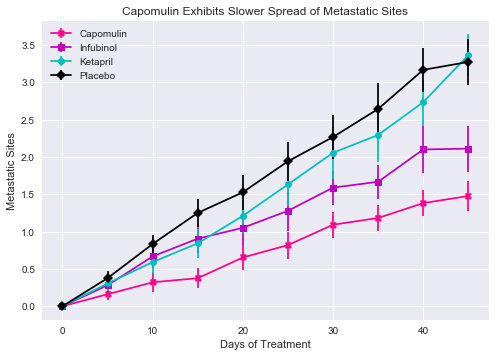

In [10]:
# plot the results
plt.errorbar(MetastaticSitesPivot.index.get_level_values(0), MetastaticSitesPivot[("Metastatic Sites","Capomulin")], color="xkcd:hot pink", marker="X", label="Capomulin",yerr=MetastaticSitesSEMPivot["Capomulin"])
plt.errorbar(MetastaticSitesPivot.index.get_level_values(0), MetastaticSitesPivot[("Metastatic Sites","Infubinol")], color="m", marker="s", label="Infubinol",yerr=MetastaticSitesSEMPivot["Infubinol"])
plt.errorbar(MetastaticSitesPivot.index.get_level_values(0), MetastaticSitesPivot[("Metastatic Sites","Ketapril")], color="c", marker="o", label="Ketapril",yerr=MetastaticSitesSEMPivot["Ketapril"])
plt.errorbar(MetastaticSitesPivot.index.get_level_values(0), MetastaticSitesPivot[("Metastatic Sites","Placebo")], color="k", marker="D", label="Placebo",yerr=MetastaticSitesSEMPivot["Placebo"])

plt.title("Capomulin Exhibits Slower Spread of Metastatic Sites")
plt.xlabel("Days of Treatment")
plt.ylabel("Metastatic Sites")       
plt.legend()

plt.show()

### Survival Rates

In [11]:
# get the survival rates per drug per timepoint
SurvivalRates = drugs4.groupby(["Drug","Timepoint"])["Mouse ID"].count().to_frame("Survival Rates")
# pivot the results so that each drug is a column
#  NOTE: if values is in brackets, it creates another level, if not in brackets, I can access without referencing the level and just call the column directly
SurvivalRatesPivot = pd.pivot_table(SurvivalRates, index="Timepoint", columns="Drug", values="Survival Rates")
SurvivalRatesPivot

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


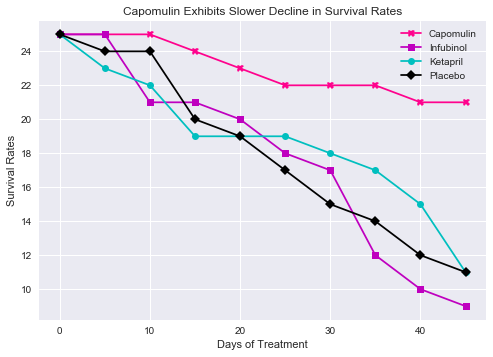

In [12]:
#plot the results
plt.plot(SurvivalRatesPivot.index.get_level_values(0), SurvivalRatesPivot["Capomulin"], color="xkcd:hot pink", marker="X", label="Capomulin")
plt.plot(SurvivalRatesPivot.index.get_level_values(0), SurvivalRatesPivot["Infubinol"], color="m", marker="s", label="Infubinol")
plt.plot(SurvivalRatesPivot.index.get_level_values(0), SurvivalRatesPivot["Ketapril"], color="c", marker="o", label="Ketapril")
plt.plot(SurvivalRatesPivot.index.get_level_values(0), SurvivalRatesPivot["Placebo"], color="k", marker="D", label="Placebo")

plt.title("Capomulin Exhibits Slower Decline in Survival Rates")
plt.xlabel("Days of Treatment")
plt.ylabel("Survival Rates")        
plt.legend()

plt.show()

### Tumor Change

In [13]:
TumorVolumePivot.reset_index(inplace=True)
TumorVolumePivot

Timepoint Tumor Volume (mm3)                                 
Drug                    Capomulin  Infubinol   Ketapril    Placebo
0            0          45.000000  45.000000  45.000000  45.000000
1            5          44.266086  47.062001  47.389175  47.125589
2           10          43.084291  49.403909  49.582269  49.423329
3           15          42.064317  51.296397  52.399974  51.359742
4           20          40.716325  53.197691  54.920935  54.364417
5           25          39.939528  55.715252  57.678982  57.482574
6           30          38.769339  58.299397  60.994507  59.809063
7           35          37.816839  60.742461  63.371686  62.420615
8           40          36.958001  63.162824  66.068580  65.052675
9           45          36.236114  65.755562  70.662958  68.084082

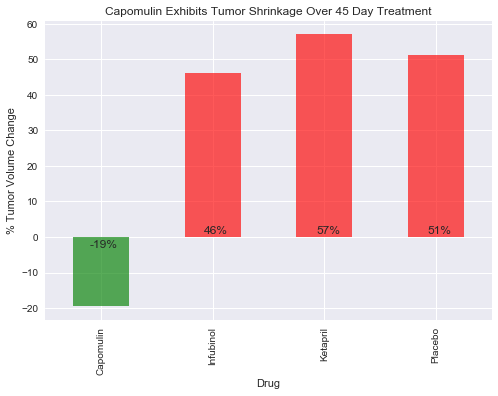

In [14]:
# get the change in tumor volume for each drug
#let's use pivot instead of pivot_table so we avoid multiple indexes (TumorVolumePivot was made via pivot_table from TumorVolume)
TumorVolume.reset_index(inplace=True) #this should only be run once
TumorVolumeChangePivot = TumorVolume.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
#subtract the first volume (iloc[0]) from the last volume (iloc[-1]), divide by the first volume (iloc[0]), multiply by 100
TumorChangePercent = (((TumorVolumeChangePivot.iloc[-1]-TumorVolumeChangePivot.iloc[0])/TumorVolumeChangePivot.iloc[0])*100).to_frame("% Change")
# Loop through % change and determine color of bar
color=[]
for p in TumorChangePercent["% Change"]:
    if p < 0:
        color.append("green")
    else:
        color.append("red")
    
TumorChangePercent.plot(kind="bar", color=color, alpha=.65)
#remove the legend
plt.legend("")
# add the percentages on the bars
x_axis = np.arange(len(TumorChangePercent))
for a,b in zip(x_axis, TumorChangePercent["% Change"]):
    if b<0:
        plt.text(a-.1, b-b - 3, "{:.0f}%".format(b))
    else:
        plt.text(a-.075, b - b + 1, "{:.0f}%".format(b))

plt.title("Capomulin Exhibits Tumor Shrinkage Over 45 Day Treatment")
plt.xlabel("Drug")
plt.ylabel("% Tumor Volume Change")  

    
plt.show()